In [11]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from bandits import softmax_bandit

In [15]:
def f(X):

    sfm_1_rewards = np.zeros(1000)

    for i in range(500):
        sfm1 = softmax_bandit(10, 1000, T=X, mu='sequence')
        sfm1.run()

        # Update long-term averages
        sfm_1_rewards = sfm_1_rewards + (
        sfm1.reward - sfm_1_rewards) / (i + 1)

    return -sfm_1_rewards[999]

 The best solution found:                                                                           
 [1.16700524]

 Objective function:
 -8.09562023080007


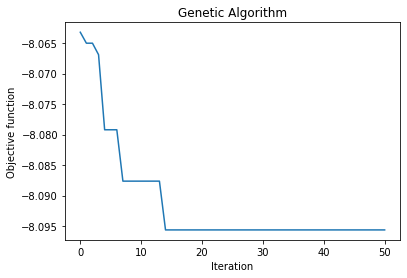

In [20]:
varbound=np.array([[0.5,1.5]]*1)

model=ga(function=f,dimension=1,variable_type='real',variable_boundaries=varbound, function_timeout=120)

model.run()

In [22]:
k=10
iters=1000
episodes=1000

sfm_1_rewards = np.zeros(iters)
sfm_2_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    sfm1 = softmax_bandit(k, iters, T=1.2, mu='sequence')
    sfm2 = softmax_bandit(k, iters, T=1.16700524, mu=sfm1.mu.copy())
    
    # Run experiments
    sfm1.run()
    sfm2.run()

    
    # Update long-term averages
    sfm_1_rewards = sfm_1_rewards + (
        sfm1.reward - sfm_1_rewards) / (i + 1)
    sfm_2_rewards = sfm_2_rewards + (
        sfm2.reward - sfm_2_rewards) / (i + 1)

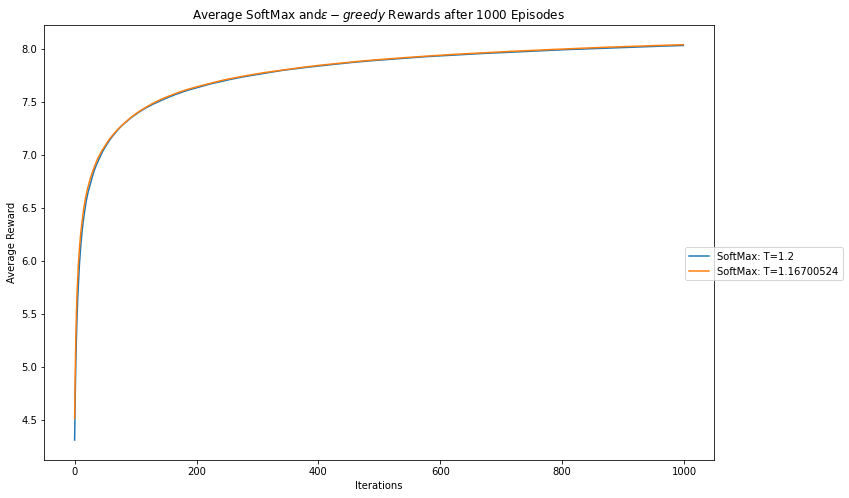

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
plt.plot(sfm_1_rewards, label="SoftMax: T="+str(sfm1.T))
plt.plot(sfm_2_rewards, label="SoftMax: T="+str(sfm2.T))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average SoftMax and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()